# HR Analytics by MoboData Data Science Group
#### For Rakamin Academy Final Project

## Import Library

In [1]:
# lets import all the required libraries
# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16, 5)
# setting up the style of the plot
plt.style.use('fivethirtyeight')

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# for machine learning
import sklearn
import imblearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/train_LZdllcl.csv')
df2 = pd.read_csv('/content/gdrive/My Drive/test_2umaH9m.csv')
display(df.head())
display(df2.head())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g47P5JFPgeHGXfL4OvzzVArJ0buM6DNYB66crenDnVle7ZJqCAdRtc


In [ ]:
df = pd.read_csv('train_LZdllcl.csv')
df2 = pd.read_csv('test_2umaH9m.csv')
display(df.head())
display(df2.head())

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


Tidak ada kolom `is_promoted` pada data testing, sehingga data testing tidak akan digunakan sebagai testing, namun testing akan didapat dengan cara split data training.
Karena itu, hanya dataset df1 saja yang dipakai dalam proses machine learning ini.

# Preprocessing Data

## Missing Data

Mencari data yang hilang (jika ada) dan memberikan solusi terhadap data tersebut

In [ ]:
display(df.info())
display(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


None

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

#### Terdapat beberapa ribu data yang hilang dalam kolom 'education' dan 'previous_year_rating'

### Imputasi

In [ ]:
# Imputasi Numerik
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)
# Imputasi Kategorik
df['education'].fillna(df['education'].mode()[0], inplace=True)

# Imputasi Numerik
df2['previous_year_rating'].fillna(df2['previous_year_rating'].median(), inplace=True)
# Imputasi Kategorik
df2['education'].fillna(df2['education'].mode()[0], inplace=True)

In [ ]:
display(df.isna().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## Data Duplicated

Memeriksa jika ada data yang duplikat atau sama persis di dalam data

In [ ]:
## CODE HERE
print('Jumlah data awal yang terduplikasi dalam data training: ', df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('Jumlah data akhir yang terduplikasi dalam data training: ', df.duplicated().sum())

Jumlah data awal yang terduplikasi dalam data training:  0
Jumlah data akhir yang terduplikasi dalam data training:  0


## Feature Engineering

2 Feature baru dibuat:
* Sum_of_metric = Gabungan dari berbagai feature / kolom yang melambangkan performa professional / kerja dari karyawan tersebut
* total_score = nilai total dalam latihan yang didapatkan karyawan

In [ ]:
# creating a Metric of Sum
df['sum_metric'] = df['awards_won?']+df['KPIs_met >80%'] + df['previous_year_rating']
# creating a total score column
df['total_score'] = df['avg_training_score'] * df['no_of_trainings']
df2['sum_metric'] = df2['awards_won?']+df['KPIs_met >80%'] + df2['previous_year_rating']
# creating a total score column
df2['total_score'] = df2['avg_training_score'] * df2['no_of_trainings']

# EDA

In [ ]:
# CODE HERE
nums = ['total_score','sum_metric','no_of_trainings','age','previous_year_rating','length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']
cats = ['department','region', 'education', 'gender','recruitment_channel']

In [ ]:
df[cats].describe()

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,39078,38496,30446


Diputuskan untuk tidak menggunakan `region` karena terlalu memiliki banyak kategori.

In [ ]:
# CODE HERE
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom department:
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

Value count kolom region:
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: in

Seperti yang bisa dilihat, pengamatan kita dari `df.describe()` tadi ternyata adalah BENAR karena:
* Sebaran nilai di kolom `department`, `region`, `education`, `gender`, `recruitment_channel`terlihat didominasi nilai tertentu
* Mayoritas data pada kolom `department` adalah kategori `Sales & Marketing` dengan frekuensi 16840
* Mayoritas data pada kolom `region` adalah kategori `region_2` dengan frekuensi 12343
* Mayoritas data pada kolom `education` adalah kategori `Bachelor's` dengan frekuensi 36669
* Mayoritas data pada kolom `gender` adalah kategori `laki-laki` dengan frekuensi 38496
* Mayoritas data pada kolom `recruitment_channel` adalah kategori `other` dengan frekuensi 30446

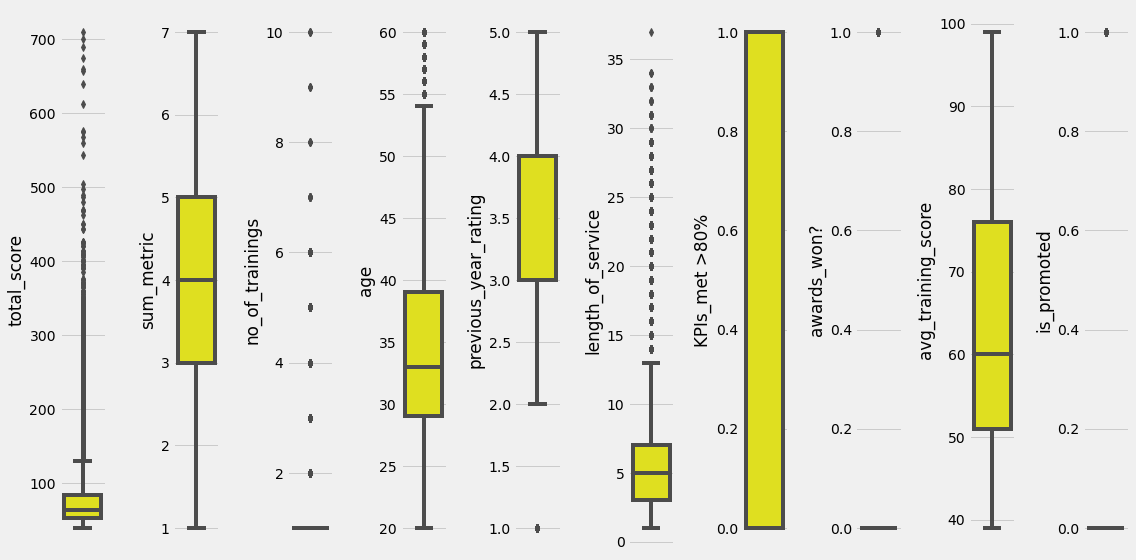

In [ ]:
# CODE HERE
plt.figure(figsize=(16,8))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='yellow', orient='v')
    plt.tight_layout()

## Deteksi Imbalance

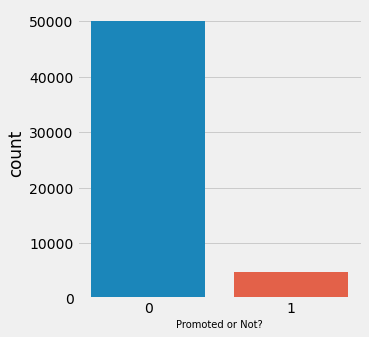

In [ ]:
# lets check the Target Class Balance
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(x=df['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)
plt.show()

Target kita `is_promoted` tidak seimbang jumlahnya / sangat timpang sekali jumlahnya (imbalance). Sehingga perlu dilakukan oversampling / undersampling.

In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170,3.679627,79.770636
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137,1.463389,43.879135
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,1.000000,39.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,3.000000,53.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,4.000000,64.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,5.000000,84.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,7.000000,710.000000


## Standarisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
## CODE HERE
df['length_of_service_norm'] = MinMaxScaler().fit_transform(df['length_of_service'].values.reshape(len(df), 1))
df['avg_training_score_norm'] = MinMaxScaler().fit_transform(df['avg_training_score'].values.reshape(len(df), 1))
df['age_norm'] = MinMaxScaler().fit_transform(df['age'].values.reshape(len(df), 1))
df['no_of_trainings_norm'] = MinMaxScaler().fit_transform(df['no_of_trainings'].values.reshape(len(df), 1))
df['previous_year_rating_norm'] = MinMaxScaler().fit_transform(df['previous_year_rating'].values.reshape(len(df), 1))
df['sum_metric_norm'] = MinMaxScaler().fit_transform(df['sum_metric'].values.reshape(len(df), 1))
df['total_score_norm'] = MinMaxScaler().fit_transform(df['total_score'].values.reshape(len(df), 1))


from sklearn.preprocessing import MinMaxScaler, StandardScaler
## CODE HERE
df2['length_of_service_norm'] = MinMaxScaler().fit_transform(df2['length_of_service'].values.reshape(len(df2), 1))
df2['avg_training_score_norm'] = MinMaxScaler().fit_transform(df2['avg_training_score'].values.reshape(len(df2), 1))
df2['age_norm'] = MinMaxScaler().fit_transform(df2['age'].values.reshape(len(df2), 1))
df2['no_of_trainings_norm'] = MinMaxScaler().fit_transform(df2['no_of_trainings'].values.reshape(len(df2), 1))
df2['previous_year_rating_norm'] = MinMaxScaler().fit_transform(df2['previous_year_rating'].values.reshape(len(df2), 1))
df2['sum_metric_norm'] = MinMaxScaler().fit_transform(df2['sum_metric'].values.reshape(len(df2), 1))
df2['total_score_norm'] = MinMaxScaler().fit_transform(df2['total_score'].values.reshape(len(df2), 1))

In [ ]:
df1=df.drop(['sum_metric', 'total_score', 'employee_id','region', 'age', 'length_of_service', 'no_of_trainings', 'previous_year_rating', 'avg_training_score'], axis=1)
df3=df2.drop(['sum_metric', 'total_score', 'employee_id','region', 'age', 'length_of_service', 'no_of_trainings', 'previous_year_rating', 'avg_training_score'], axis=1)

## Kode untuk mengganti data tipe object menjadi integer

In [ ]:
#untuk df1
df1['gender']=df1['gender'].map({'f':1,'m':2})
df1['department']=df1['department'].map({'Sales & Marketing':1,'Operations':2, 'Procurement':3, 'Technology':4, 'Analytics':5, 'Finance':6, 'HR':7, 'Legal':8, 'R&D':9})
df1['education']=df1['education'].map({"Below Secondary":1, "Bachelor's":2, "Master's & above":3})
df1['recruitment_channel']=df1['recruitment_channel'].map({'other':1, 'sourcing':2, 'referred':3})

#untuk df2
df3['gender']=df3['gender'].map({'f':1,'m':2})
df3['department']=df3['department'].map({'Sales & Marketing':1,'Operations':2, 'Procurement':3, 'Technology':4, 'Analytics':5, 'Finance':6, 'HR':7, 'Legal':8, 'R&D':9})
df3['education']=df3['education'].map({"Below Secondary":1, "Bachelor's":2, "Master's & above":3})
df3['recruitment_channel']=df3['recruitment_channel'].map({'other':1, 'sourcing':2, 'referred':3})

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   department                 54808 non-null  int64  
 1   education                  54808 non-null  int64  
 2   gender                     54808 non-null  int64  
 3   recruitment_channel        54808 non-null  int64  
 4   KPIs_met >80%              54808 non-null  int64  
 5   awards_won?                54808 non-null  int64  
 6   is_promoted                54808 non-null  int64  
 7   length_of_service_norm     54808 non-null  float64
 8   avg_training_score_norm    54808 non-null  float64
 9   age_norm                   54808 non-null  float64
 10  no_of_trainings_norm       54808 non-null  float64
 11  previous_year_rating_norm  54808 non-null  float64
 12  sum_metric_norm            54808 non-null  float64
 13  total_score_norm           54808 non-null  flo

In [ ]:
df4=df3.copy()

# Dataset Split Train/Test

In [ ]:
y = df1['is_promoted']
x = df1.drop(['is_promoted'], axis = 1)
x_test = df4

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size =0.3, random_state = 42)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)

Shape of the x Train : (38365, 13)
Shape of the y Train : (38365,)
Shape of the x Valid : (16443, 13)
Shape of the y Valid : (16443,)


# Resampling Data Untuk Dataset Train

In [ ]:
pd.Series(y_train).value_counts()

0    35030
1     3335
Name: is_promoted, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_sample(x_train, y_train.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(70060, 13)
(70060,)


In [ ]:
pd.Series(y_resample).value_counts()

1    35030
0    35030
dtype: int64

In [ ]:
print("Before Resampling :")
print(y.value_counts())
print(y_train.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    50140
1     4668
Name: is_promoted, dtype: int64
0    35030
1     3335
Name: is_promoted, dtype: int64
After Resampling :
1    35030
0    35030
Name: 0, dtype: int64


# Modelling

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() # default n_estimator: 100
rf.fit(x_resample,y_resample.values.ravel())

#predict
y_predicted = rf.predict(x_valid)

#eval
from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_valid, y_predicted)) # generate the precision, recall, f-1 score, num


classification report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     15110
           1       0.52      0.40      0.46      1333

    accuracy                           0.92     16443
   macro avg       0.74      0.69      0.71     16443
weighted avg       0.91      0.92      0.92     16443



In [ ]:
roc_auc_score(y_valid, y_predicted, average='micro', sample_weight=None)

0.6852771101445116

### Percobaan Kedua

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() # default n_estimator: 100
rf.fit(x_resample,y_resample.values.ravel())

#predict
y_predicted = rf.predict(x_valid)

#eval
from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_valid, y_predicted)) # generate the precision, recall, f-1 score, num


classification report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     15110
           1       0.53      0.40      0.45      1333

    accuracy                           0.92     16443
   macro avg       0.74      0.68      0.71     16443
weighted avg       0.91      0.92      0.92     16443



In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
roc_auc_score(y_valid, y_predicted, average='micro', sample_weight=None)

0.6827727199834374

In [ ]:
y_pred_test = rf.predict(x_test)

In [ ]:
hasil=pd.DataFrame(df3[['department']])
hasil['Predictionfix']=pd.DataFrame(y_pred_test)
hasil

,department,Predictionfix
0,4,0
1,7,0
2,1,0
3,3,0
4,6,0
...,...,...
23485,8,0
23486,4,0
23487,7,0
23488,3,0


In [ ]:
hasil.to_excel('/content/gdrive/My Drive/promosi2.xlsx',index=False)

In [ ]:
from sklearn import metrics
cf = metrics.confusion_matrix(y_valid, y_predicted)

### Matrix untuk Perco

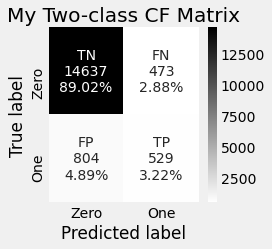

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
#         plt.xlabel('Predicted label' + stats_text)
        plt.xlabel('Predicted label' + '')
    else:
#         plt.xlabel(stats_text)
        plt.xlabel('')
    
    if title:
        plt.title(title)

labels = ['TN','FN','FP','TP']
categories = ['Zero', 'One']
make_confusion_matrix(cf, group_names=labels, categories=categories, cmap='binary', title='My Two-class CF Matrix')

Nilai AUC : 0.6827727199834374


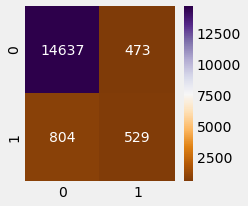

In [ ]:
fpr, tpr, thresholds = roc_curve(y_valid, y_predicted, pos_label=1)
print("Nilai AUC :", auc(fpr, tpr))
cm = metrics.confusion_matrix(y_valid, y_predicted)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'PuOr', fmt = '.8g')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

#List Hyperparameters yang akan diuji
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)] # Number of trees in random forest
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
# max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Init random forest dengan randomsearch, cross validation = 5
rf = RandomForestClassifier(random_state=42)
clf = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42)

#Fitting Model
best_model = clf.fit(x_resample,y_resample.values.ravel())

#Nilai hyperparameters terbaik
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

#Prediksi menggunakan model baru
y_predicted = best_model.predict(x_valid)#Check performa dari model
print(classification_report(y_valid, y_predicted))
print('NIlai ROC:' roc_auc_score(y_valid, y_predicted))

Best n_estimators: 644
Best max_depth: 70
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     15110
           1       0.57      0.40      0.47      1333

    accuracy                           0.93     16443
   macro avg       0.76      0.69      0.72     16443
weighted avg       0.92      0.93      0.92     16443



0.6869645356408592

## Hypertuning Percobaan Kedua

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

#List Hyperparameters yang akan diuji
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)] # Number of trees in random forest
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
# max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Init random forest dengan randomsearch, cross validation = 5
rf = RandomForestClassifier(random_state=42)
clf = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42)

#Fitting Model
best_model = clf.fit(x_resample,y_resample.values.ravel())

#Nilai hyperparameters terbaik
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

#Prediksi menggunakan model baru
y_predicted = best_model.predict(x_valid)#Check performa dari model
print(classification_report(y_valid, y_predicted))
roc_auc_score(y_valid, y_predicted)

Best n_estimators: 555
Best max_depth: 70
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     15110
           1       0.59      0.39      0.47      1333

    accuracy                           0.93     16443
   macro avg       0.77      0.68      0.72     16443
weighted avg       0.92      0.93      0.92     16443



0.6833015748973643

In [ ]:
roc_auc_score(y_valid, y_predicted, average='micro', sample_weight=None)

0.6869645356408592

In [ ]:
y_pred_test = best_model.predict(x_test)

In [ ]:
hasil=pd.DataFrame(df3[['department']])
hasil['Prediction']=pd.DataFrame(y_pred_test)
hasil

,department,Prediction
0,4,0
1,7,0
2,1,0
3,3,0
4,6,0
...,...,...
23485,8,0
23486,4,0
23487,7,0
23488,3,0


## Feature Importance Score: Random Forest

In [ ]:
hasil.to_excel('/content/gdrive/My Drive/promosifix.xlsx',index=False)

Text(0.5, 1.0, 'feature importance score')

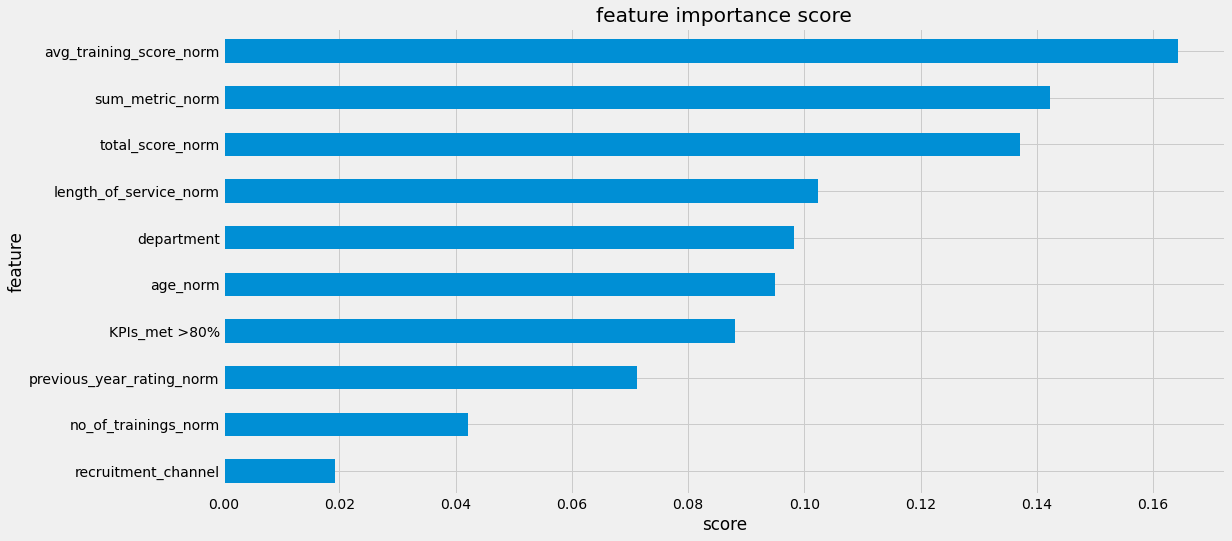

In [ ]:
plt.figure(figsize=(16,8))
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

#### Dilihat dari Feature Importance diatas bahwa avg_training_score_norm merupakan feature yang paling penting (Mempengaruhi promosi) dalam model ini. Diikuti dengan previous_year_rating

## Decision Tree Model

F1-score : 0.8958106842604497
Accuracy : 0.8902876604026029
Nilai AUC : 0.6892741550708658


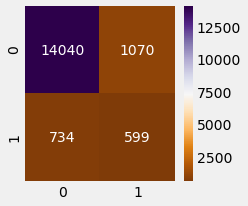

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=42)
model.fit(x_resample, y_resample)
y_pred = model.predict(x_valid)
# f1 score
score1=f1_score(y_valid, y_pred, average='weighted')
print("F1-score :", score1)
print("Accuracy :", accuracy_score(y_valid, y_pred))
fpr, tpr, thresholds = roc_curve(y_valid, y_pred, pos_label=1)
print("Nilai AUC :", auc(fpr, tpr))
cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'PuOr', fmt = '.8g')
plt.show()

In [ ]:
cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     15110
           1       0.36      0.45      0.40      1333

    accuracy                           0.89     16443
   macro avg       0.65      0.69      0.67     16443
weighted avg       0.90      0.89      0.90     16443



In [ ]:
roc_auc_score(y_valid, y_pred, average='micro', sample_weight=None)

0.6892741550708658

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# list of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features
                }

# Init Logres dengan Gridsearch, cross validation = 5
dt2 = DecisionTreeClassifier(random_state=42)
clf = RandomizedSearchCV(dt2, hyperparameters, cv=5, random_state=42)

#Fitting Model
best_model = clf.fit(x_resample, y_resample)

#Prediksi menggunakan model baru
y_predicted = best_model.predict(x_valid)#Check performa dari model
print(classification_report(y_valid, y_predicted))
roc_auc_score(y_valid, y_predicted)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     15110
           1       0.37      0.42      0.39      1333

    accuracy                           0.89     16443
   macro avg       0.66      0.68      0.67     16443
weighted avg       0.90      0.89      0.90     16443



0.6770498216877183

## K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(x_resample,y_resample)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [ ]:
y_predicted = knn.predict(x_valid)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_valid, y_predicted))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_valid, y_predicted))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_valid, y_predicted)) # generate the precision, recall, f-1 score, num


confustion matrix
[[13208  1902]
 [  616   717]]

accuracy
0.8468649273246974

classification report
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     15110
           1       0.27      0.54      0.36      1333

    accuracy                           0.85     16443
   macro avg       0.61      0.71      0.64     16443
weighted avg       0.90      0.85      0.87     16443



In [ ]:
roc_auc_score(y_valid, y_predicted, average='micro', sample_weight=None)

0.7060037842021724

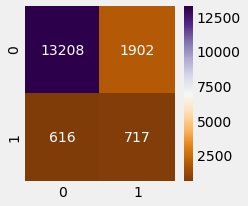

In [ ]:
cm = confusion_matrix(y_valid, y_predicted)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'PuOr', fmt = '.8g')
plt.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=43)
logreg.fit(x_resample,y_resample.values.ravel())

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=43)

In [ ]:
y_predicted = logreg.predict(x_valid)
y_predicted

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_valid, y_predicted))


classification report
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     15110
           1       0.20      0.76      0.32      1333

    accuracy                           0.74     16443
   macro avg       0.59      0.75      0.58     16443
weighted avg       0.91      0.74      0.79     16443



In [ ]:
roc_auc_score(y_valid, y_predicted, average='micro', sample_weight=None)

0.7450589401155716

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_valid, y_predicted, pos_label=1)
auc(fpr, tpr)

0.7450589401155716

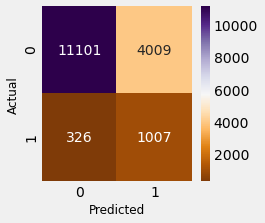

In [ ]:
cm = confusion_matrix(y_valid, y_predicted)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'PuOr', fmt = '.8g')
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12);
plt.show()

### Hypertuning with GridSearch (For LOGREG)

In [ ]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters yang akan diuji
penalty = ['l2']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.

#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C)

# Init Logres dengan Gridsearch, cross validation = 5
logreg = LogisticRegression(random_state=42, max_iter=5000)
clf = GridSearchCV(logreg, hyperparameters, cv=5)

#Fitting Model
best_model = clf.fit(x_resample,y_resample.values.ravel())

#Nilai hyperparameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

#Prediksi menggunakan model baru
y_pred = best_model.predict(x_valid)#Check performa dari model
print(classification_report(y_valid, y_predicted))
roc_auc_score(y_valid, y_predicted)

Best Penalty: l2
Best C: 0.002
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     15110
           1       0.20      0.76      0.32      1333

    accuracy                           0.74     16443
   macro avg       0.59      0.75      0.58     16443
weighted avg       0.91      0.74      0.79     16443



0.7450589401155716

## XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=32,learning_rate=1.5,  max_depth=13, n_estimators=30)
xg.fit(x_resample,y_resample.values.ravel())

#predict
y_predicted = xg.predict(x_valid)

#eval
from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_valid, y_predicted)) # generate the precision, recall, f-1 score, num

[20:24:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

classification report
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     15110
           1       0.47      0.43      0.45      1333

    accuracy                           0.91     16443
   macro avg       0.71      0.69      0.70     16443
weighted avg       0.91      0.91      0.91     16443



In [ ]:
print('ROC AUC SCORE')
roc_auc_score(y_valid, y_predicted, average='micro', sample_weight=None)

ROC AUC SCORE


0.692106870198688

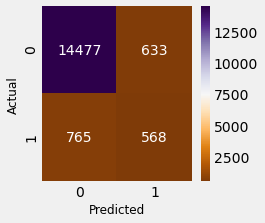

In [ ]:
cm = confusion_matrix(y_valid, y_predicted)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'PuOr', fmt = '.8g')
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12);
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'eta': [0.1, 0.2, 0.3],
                    'gamma': [0, 0.1, 0.2]
                   
                  }

# Init Logres dengan Gridsearch, cross validation = 5
xg = XGBClassifier(random_state=42,learning_rate=1.2,  max_depth=8, disable_default_eval_metric=True, use_label_encoder=False)
clf = RandomizedSearchCV(xg, hyperparameters, cv=5, scoring='f1_macro')

#Fitting Model
best_model = clf.fit(x_resample, y_resample)

#Nilai hyperparameters terbaik
# print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
# print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])

#Prediksi menggunakan model baru
# y_predicted = best_model.predict(X_train)
y_predicted = best_model.predict(x_valid)#Check performa dari model
print(classification_report(y_valid, y_predicted))
roc_auc_score(y_valid, y_predicted)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     15110
           1       0.51      0.41      0.45      1333

    accuracy                           0.92     16443
   macro avg       0.73      0.69      0.71     16443
weighted avg       0.91      0.92      0.92     16443



0.6867334967428157

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'eta': [0.1, 0.2, 0.3],
                    'gamma': [0, 0.1, 0.2]
                   
                  }

# Init Logres dengan Gridsearch, cross validation = 5
xg = XGBClassifier(random_state=42,learning_rate=1.2,  max_depth=8, disable_default_eval_metric=True, use_label_encoder=False)
clf = GridSearchCV(xg, hyperparameters, cv=5, scoring='f1_macro')

#Fitting Model
best_model = clf.fit(x_resample, y_resample)

#Nilai hyperparameters terbaik
# print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
# print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])

#Prediksi menggunakan model baru
# y_predicted = best_model.predict(X_train)
y_predicted = best_model.predict(x_valid)#Check performa dari model
print(classification_report(y_valid, y_predicted))
roc_auc_score(y_valid, y_predicted)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     15110
           1       0.51      0.41      0.45      1333

    accuracy                           0.92     16443
   macro avg       0.73      0.69      0.71     16443
weighted avg       0.91      0.92      0.92     16443



0.6867334967428157

## Boosting: AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(random_state=0, n_estimators=100, learning_rate=1.5)
ab.fit(x_resample,y_resample.values.ravel())

#predict
y_predicted = ab.predict(x_valid)

#eval
from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_valid, y_predicted)) # generate the precision, recall, f-1 score, num


classification report
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     15110
           1       0.30      0.49      0.37      1333

    accuracy                           0.87     16443
   macro avg       0.63      0.69      0.65     16443
weighted avg       0.90      0.87      0.88     16443



In [ ]:
print('ROC-AUC SCORE:')
roc_auc_score(y_valid, y_predicted, average='micro', sample_weight=None)

ROC-AUC SCORE:


0.6938000549111468

### Tuning with HyperParameter: AdaBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                   'n_estimators': [10, 50, 100, 500, 1000],
                   'learning_rate':np.arange(0.1, 2.1, 0.1)
                  }

# Init Logres dengan Gridsearch, cross validation = 5
ab = AdaBoostClassifier(random_state=42)
clf = RandomizedSearchCV(ab, hyperparameters, cv=5, scoring='f1_macro')

#Fitting Model
best_model = clf.fit(x_resample,y_resample.values.ravel())

#Nilai hyperparameters terbaik
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])

#Prediksi menggunakan model baru
# y_predicted = best_model.predict(X_train)
y_predicted = best_model.predict(x_valid)#Check performa dari model
print(classification_report(y_valid, y_predicted))
roc_auc_score(y_valid, y_predicted)

Best n_estimators: 1000
Best learning_rate: 1.3000000000000003
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     15110
           1       0.51      0.34      0.41      1333

    accuracy                           0.92     16443
   macro avg       0.73      0.66      0.68     16443
weighted avg       0.91      0.92      0.91     16443



0.6557546732811596

## Bonus: Insight Mengenai Training

In [ ]:
df1.groupby(['no_of_trainings_norm'])['previous_year_rating_norm'].mean().reset_index()

,no_of_trainings_norm,previous_year_rating_norm
0,0.000000,0.583780
1,0.111111,0.554651
2,0.222222,0.522100
3,0.333333,0.479167
4,0.444444,0.435547
5,0.555556,0.426136
6,0.666667,0.541667
7,0.777778,0.450000
8,0.888889,0.450000
9,1.000000,0.400000


#### Bila dilihat dalam table diatas, jumlah training / latihan karyawan tidak mempunyai pengaruh positif kedalam rating karyawan tersebut.
##### Harus dipahami bahwa jumlah karyawan yang mempunyai training lebih banyak dari 1 (lebih dari 1) sangat timpang dengan karyawan yang hanya mempunyai 1 latihan, akan tetapi nilai rating dengan jumlah training 1 tetap paling tinggi dibandingkan karyawan yang mempunyai jumlah latihan lebih banyak

#### = Training yang dilakukan tidak efektif